# Extract Family Relationships with BERT NER

One of the most useful applications of NLP technology is information extraction from unstructured texts — contracts, financial documents, healthcare records, etc. — that enables automatic data query to derive new insights. Traditionally, named entity recognition has been widely used to identify entities inside a text and store the data for advanced querying. 

Here we will be atempting to do this with BERT specificly we will be looking to extract family relations from using BERT's NER functionality and seeing if we can refine the base approach to be used more directly in a function or class of functions enabling us to gather all the family data from unstructered text. 

<br/>

####Orginal links, 
BERT
https://huggingface.co/dslim/bert-base-NER 
https://towardsdatascience.com/
<br/>
<br/>
Spacy 3 
https://towardsdatascience.com/how-to-train-a-joint-entities-and-relation-extraction-classifier-using-bert-transformer-with-spacy-49eb08d91b5c 




# Model 1 description
bert-base-NER is a fine-tuned BERT model that is ready to use for Named Entity Recognition and achieves state-of-the-art performance for the NER task. It has been trained to recognize four types of entities: location (LOC), organizations (ORG), person (PER) and Miscellaneous (MISC).

Specifically, this model is a bert-base-cased model that was fine-tuned on the English version of the standard CoNLL-2003 Named Entity Recognition dataset.

If you'd like to use a larger BERT-large model fine-tuned on the same dataset, a bert-large-NER version is also available.

### How to use
You can use this model with Transformers pipeline for NER.
First install transformers

In [ ]:
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 31.6 MB/s 
     |████████████████████████████████| 6.6 MB 61.3 MB/s 
     |████████████████████████████████| 120 kB 66.5 MB/s 


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

## Pull in our target model 

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")


## Use the model to extract NER
Now that we have our target model set up we can use it to extract NER from a target sentence in its base form lets begin with a test use case to get a baseline of intial capabilites 

In [ ]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(' Full results')
print(ner_results)
print()
print('Results Break down')

for x in ner_results:
  print(x)


 Full results
[{'entity': 'B-PER', 'score': 0.9990139, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]

Results Break down
{'entity': 'B-PER', 'score': 0.9990139, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}
{'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}


## Family Text Extraction
From here we can see names and places being able to be targeted within the text with ease a good start but we need more for our specific use case. To start lets see how well we can target family based information in text.

In [ ]:
text = 'patient went to the Hospital on thursday with my grandma Estus Meril last week. she was suffering from hedaches she said both her sons were as well'

ner_results = nlp(text)
print(' Full results')
print(ner_results)
print()
print('Results Break down')
for x in ner_results:
  print(x)

 Full results
[{'entity': 'B-LOC', 'score': 0.79242015, 'index': 5, 'word': 'Hospital', 'start': 20, 'end': 28}, {'entity': 'B-PER', 'score': 0.9965391, 'index': 14, 'word': 'E', 'start': 57, 'end': 58}, {'entity': 'B-PER', 'score': 0.8021466, 'index': 15, 'word': '##st', 'start': 58, 'end': 60}, {'entity': 'I-PER', 'score': 0.59022343, 'index': 16, 'word': '##us', 'start': 60, 'end': 62}, {'entity': 'I-PER', 'score': 0.98864496, 'index': 17, 'word': 'Me', 'start': 63, 'end': 65}, {'entity': 'I-PER', 'score': 0.6699035, 'index': 18, 'word': '##ril', 'start': 65, 'end': 68}]

Results Break down
{'entity': 'B-LOC', 'score': 0.79242015, 'index': 5, 'word': 'Hospital', 'start': 20, 'end': 28}
{'entity': 'B-PER', 'score': 0.9965391, 'index': 14, 'word': 'E', 'start': 57, 'end': 58}
{'entity': 'B-PER', 'score': 0.8021466, 'index': 15, 'word': '##st', 'start': 58, 'end': 60}
{'entity': 'I-PER', 'score': 0.59022343, 'index': 16, 'word': '##us', 'start': 60, 'end': 62}
{'entity': 'I-PER', 'scor

As we can see this is giving us some of the names not all and can't id any non name info we are looking for like that their are grandma relationships as well as sons involved here.



Using a combo approach
Next lets try a more in depth a approach with spacy 3 and bert to get a better extraction of relation ship based entitys.



##How to Train aEntities and Relation Extraction Classifier using BERT Transformer with spaCy 3
A step-by-step guide on how to train a relation extraction classifier using Transformer and spaCy3

using the new Thinc library from spaCy We train the relation extraction model following the steps outlined in spaCy’s documentation. We will compare the performance of the relation classifier using transformers and tok2vec algorithms. Finally, we will test the model on a job description found online.

## Relation Classification:
At its core, the relation extraction model is a classifier that predicts a relation r for a given pair of entity {e1, e2}. In case of transformers, this classifier is added on top of the output hidden states. For more information about relation extraction, please read this excellent article outlining the theory of fine tuning transformer model for relation classification.

The pre-trained model that we are going to fine-tune is the roberta-base model but you can use any pre-trained model available in huggingface library by simply inputting the name in the config file (see below).

In this tutorial we are going to extract the relationship between the two entities {Experience, Skills} as Experience_in and between {Diploma, Diploma_major} as Degree_in. The goal is to extract the years of experience required in a specific skills and the diploma major associated to the required diploma. You can of course, train your own relation classifier for your own use case such as finding the cause/effect of symptoms in health records or company acquisitions in financial documents. The possibilities are limitless…

In this tutorial, we will only cover the entity relation extraction part. For fine-tuning BERT NER using spaCy 3, please refer to this previous article.

https://towardsdatascience.com/how-to-fine-tune-bert-transformer-with-spacy-3-6a90bfe57647

# Data Annotation:
As in my previous article, we use UBIAI text annotation tool to perform the joint entity and relation annotation because of its versatile interface that allows us to switch between entity and relation annotation easily (see below):


https://ubiai.tools/

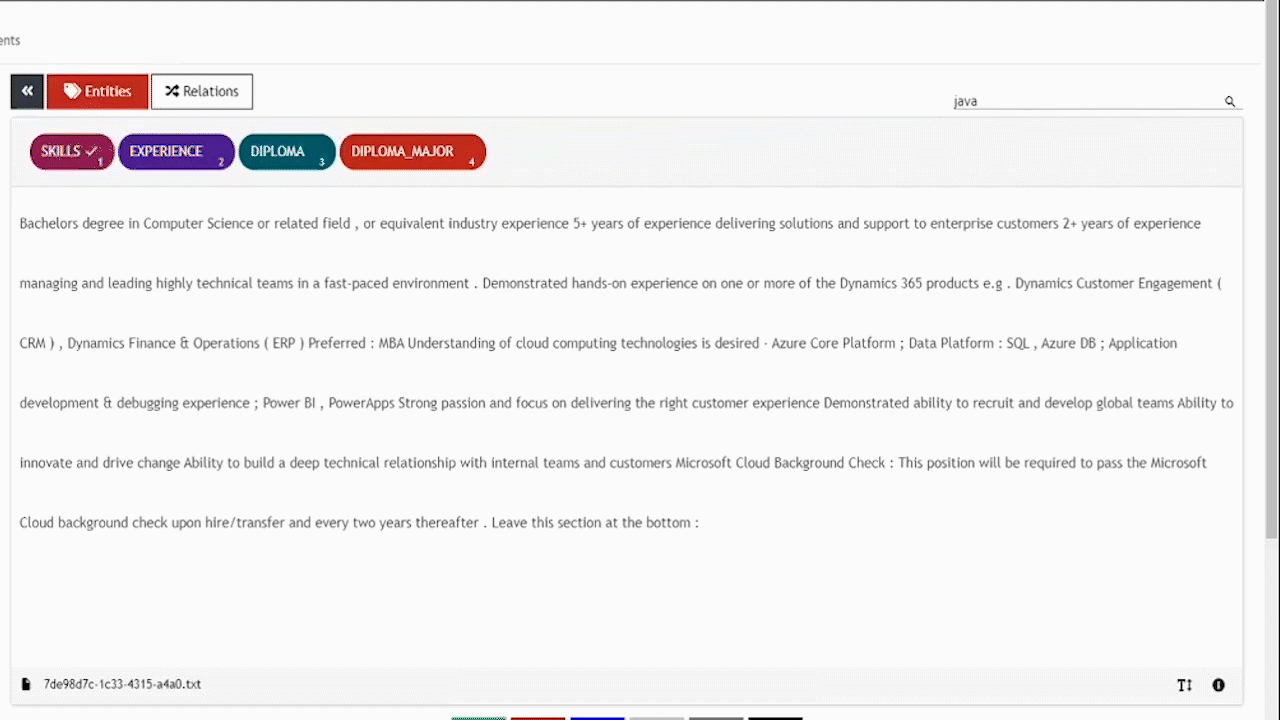

For this tutorial, I have only annotated around 100 documents containing entities and relations. For production, we will certainly need more annotated data.

#Data Preparation:
Before we train the model, we need to convert our annotated data to a binary spacy file. We first split the annotation generated from UBIAI into training/dev/test and save them separately. We modify the code that is provided in spaCy’s tutorial repo to create the binary file for our own annotation (conversion code).

We repeat this step for the training, dev and test dataset to generate three binary spacy files (files available in github).

https://github.com/walidamamou/relation_extraction_transformer

# Relation Extraction Model Training:
For training, we will provide the entities from our golden corpus and train the classifier on these entities.

Open a new Google Colab project and make sure to select GPU as hardware accelerator in the notebook settings. Make sure GPU is enabled by running: !nvidia-smi
Install spacy-nightly:

In [ ]:
!pip install -U spacy-nightly --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.6/660.6 kB 48.0 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.2
    Uninstalling pydantic-1.9.2:
      Successfully uninstalled pydantic-1.9.2
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.4.1 requires thinc<8.

In [1]:
!pip install spacy
# !pip install spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Install the wheel package and clone spacy’s relation extraction repo:

In [ ]:
!pip install -U pip setuptools wheel
!python -m spacy project clone tutorials/rel_component

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 49.6 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


✔ Cloned 'tutorials/rel_component' from 'explosion/projects' (branch
'v3')
/content/rel_component
✔ Your project is now ready!
To fetch the assets, run:
python -m spacy project assets /content/rel_component


Install transformer pipeline and spacy transformers library:

Change directory to rel_component folder: cd rel_component
Create a folder with the name “data” inside rel_component and upload the training, dev and test binary files into it:

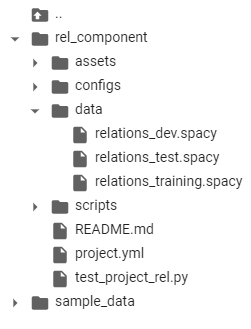

Open project.yml file and update the training, dev and test path:

In [ ]:
train_file: "data/relations_training.spacy"
dev_file: "data/relations_dev.spacy"
test_file: "data/relations_test.spacy"

You can change the pre-trained transformer model (if you want to use a different language, for example), by going to the configs/rel_trf.cfg and entering the name of the model:

You can change the pre-trained transformer model (if you want to use a different language, for example), by going to the configs/rel_trf.cfg and entering the name of the model:

    [components.transformer.model]
    @architectures = "spacy-transformers.TransformerModel.v1"
    name = "roberta-base" # Transformer model from huggingface
    tokenizer_config = {"use_fast": true}

Before we start the training, we will decrease the max_length in configs/rel_trf.cfg from the default 100 token to 20 to increase the efficiency of our model. The max_length corresponds to the maximum distance between two entities above which they will not be considered for relation classification. As a result, two entities from the same document will be classified, as long as they are within a maximum distance (in number of tokens) of each other.

    [components.relation_extractor.model.create_instance_tensor.get_instances]
    misc = "rel_instance_generator.v1"
    max_length = 20

We are finally ready to train and evaluate the relation extraction model; just run the commands below:

In [ ]:
!spacy project run train_gpu # command to train train transformers
!spacy project run evaluate # command to evaluate on test dataset


================================= train_gpu =================================
Running command: /usr/bin/python3 -m spacy train configs/rel_trf.cfg --output training --paths.train data/relations_training.spacy --paths.dev data/relations_dev.spacy -c ./scripts/custom_functions.py --gpu-id 0
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
Set up nlp object from config
INFO:spacy:Set up nlp object from config
Pipeline: ['transformer', 'relation_extractor']
INFO:spacy:Pipeline: ['transformer', 'relation_extractor']
Created vocabulary
INFO:spacy:Created vocabulary
Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the ch

After the model is done training, the evaluation on the test data set will immediately start and display the predicted versus golden labels. The model will be saved in a folder named “training” along with the scores of our model.

To train the non-transformer model tok2vec, run the following command instead:

In [ ]:
!spacy project run train_cpu # command to train train tok2vec
!spacy project run evaluate


================================= train_cpu =================================
Running command: /usr/bin/python3 -m spacy train configs/rel_tok2vec.cfg --output training --paths.train data/relations_training.spacy --paths.dev data/relations_dev.spacy -c ./scripts/custom_functions.py
ℹ Using CPU

=========================== Initializing pipeline ===========================
Set up nlp object from config
INFO:spacy:Set up nlp object from config
Pipeline: ['tok2vec', 'relation_extractor']
INFO:spacy:Pipeline: ['tok2vec', 'relation_extractor']
Created vocabulary
INFO:spacy:Created vocabulary
Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
Initialized pipeline components: ['tok2vec', 'relation_extractor']
INFO:spacy:Initialized pipeline components: ['tok2vec', 'relation_extractor']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'relation_extractor']
ℹ Initial learn rate: 0.001
E    #  

We can compare the performance of the two models:

    # Transformer model
    "performance":{
    "rel_micro_p":0.8476190476,
    "rel_micro_r":0.9468085106,
    "rel_micro_f":0.8944723618,
    }
    # Tok2vec model
      "performance":{
    "rel_micro_p":0.8604651163,
    "rel_micro_r":0.7872340426,
    "rel_micro_f":0.8222222222,
    }

The transformer based model’s precision and recall scores are significantly better than tok2vec and demonstrate the usefulness of transformers when dealing with low amount of annotated data.

Joint Entity and Relation Extraction Pipeline:
Assuming that we have already trained a transformer NER model as in my previous post, we will extract entities from a job description found online (that was not part of the training nor the dev set) and feed them to the relation extraction model to classify the relationship.

Install spacy transformers and transformer pipeline
Load the NER model and extract entities:

In [5]:
import spacy

#nlp = spacy.load("training/model-best")
nlp = spacy.load('en_core_web_sm')


text=['''2+ years of non-internship professional software development experience
Programming experience with at least one modern language such as Java, C++, or C# including object-oriented design.
1+ years of experience contributing to the architecture and design (architecture, design patterns, reliability and scaling) of new and current systems.
Bachelor / MS Degree in Computer Science. Preferably a PhD in data science.
8+ years of professional experience in software development. 2+ years of experience in project management.
Experience in mentoring junior software engineers to improve their skills, and make them more effective, product software engineers.
Experience in data structures, algorithm design, complexity analysis, object-oriented design.
3+ years experience in at least one modern programming language such as Java, Scala, Python, C++, C#
Experience in professional software engineering practices & best practices for the full software development life cycle, including coding standards, code reviews, source control management, build processes, testing, and operations
Experience in communicating with users, other technical teams, and management to collect requirements, describe software product features, and technical designs.
Experience with building complex software systems that have been successfully delivered to customers
Proven ability to take a project from scoping requirements through actual launch of the project, with experience in the subsequent operation of the system in production''']


#loop through and perform the operation 
for doc in nlp.pipe(text, disable=["tagger"]):
   print(f"spans: {[(e.start, e.text, e.label_) for e in doc.ents]}")

spans: [(0, '2+ years', 'DATE'), (15, 'at least one', 'CARDINAL'), (22, 'Java', 'PERSON'), (24, 'C++', 'PERSON'), (36, '1+ years', 'DATE'), (64, 'Bachelor / MS Degree', 'ORG'), (74, 'PhD', 'WORK_OF_ART'), (80, '8+ years', 'DATE'), (90, '2+ years', 'DATE'), (139, '3+ years', 'DATE'), (144, 'at least one', 'CARDINAL'), (152, 'Java', 'PERSON'), (154, 'Scala', 'GPE'), (156, 'Python', 'GPE'), (158, 'C++', 'WORK_OF_ART')]


Now lets try this on our orginal sentence and see what we can surmise

In [9]:
nlp = spacy.load("en_core_web_sm")
text = 'patient went to the Hospital on thursday with my grandma Estus Meril last week. she was suffering from hedaches she said both her sons were as well'
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


patient patient PROPN NNP nsubj xxxx True False
went go VERB VBD ROOT xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
Hospital Hospital PROPN NNP pobj Xxxxx True False
on on ADP IN prep xx True True
thursday thursday PROPN NNP pobj xxxx True False
with with ADP IN prep xxxx True True
my my PRON PRP$ poss xx True True
grandma grandma NOUN NN pobj xxxx True False
Estus Estus PROPN NNP compound Xxxxx True False
Meril Meril PROPN NNP appos Xxxxx True False
last last ADJ JJ amod xxxx True True
week week NOUN NN npadvmod xxxx True False
. . PUNCT . punct . False False
she she PRON PRP nsubj xxx True True
was be AUX VBD aux xxx True True
suffering suffer VERB VBG ROOT xxxx True False
from from ADP IN prep xxxx True True
hedaches hedache NOUN NNS pobj xxxx True False
she she PRON PRP nsubj xxx True True
said say VERB VBD parataxis xxxx True False
both both DET DT det xxxx True True
her her PRON PRP$ poss xxx True True
sons son NOUN NNS nsubj xxxx True False
were

now lets show a full breakdown

In [13]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})